<a href="https://colab.research.google.com/github/UFM-Market-Trends/UFM-Market-Trends-SDK/blob/main/examples/4_Sector_Externo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pyxlsb
import datetime
!pip install git+https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git
import ufmtrends_sdk as trends
today = datetime.date.today().strftime("%Y-%m-%d")
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to /tmp/pip-req-build-a_iapqyc
  Running command git clone -q https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git /tmp/pip-req-build-a_iapqyc
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://colab.research.google.com/notebooks/snippets/gcs.ipynb
from google.colab import auth
auth.authenticate_user()

project_id = 'ufm-market-trends'
!gcloud config set project {project_id}

Updated property [core/project].


# Sector Externo

In [ ]:
# Recurso opcional de referencia
# https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
# https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row


def download_balance_payments(balance_payments_url=None):
  if balance_payments_url==None:
    balance_payments_url="https://www.banguat.gob.gt/sites/default/files/banguat/Publica/vi_man_bpagos/vi_balanza_pagos_trimestral_ver_banguat.xls"


  balance_payements_dataframe = pd.read_excel(balance_payments_url, 
                                              sheet_name=0,
                                              skiprows=6,
                                              skipfooter=4)
  balance_payements_dataframe
  balance_payements_dataframe.drop(balance_payements_dataframe.iloc[:,0:1], 
                                  axis=1, 
                                  inplace=True)
  balance_payements_dataframe = balance_payements_dataframe.T
  balance_payements_dataframe.reset_index(inplace=True)

  new_header = balance_payements_dataframe.iloc[0]
  balance_payements_dataframe = balance_payements_dataframe[1:] 
  balance_payements_dataframe.columns = new_header
  balance_payements_dataframe.rename(columns={'Descripción': 'date'},
                                    inplace=True)

  balance_payements_dataframe.reset_index(inplace=True,drop=True)

  year_rows = np.arange(start=4,
                        stop=len(balance_payements_dataframe["date"]),
                        step=5)
  # Última fila también tendrá un acumulado de lo que va del año.
  latest_year_row = len(balance_payements_dataframe["date"]) -1

  balance_payements_dataframe.drop(list(year_rows) + [latest_year_row], 
                                  inplace=True)

  balance_payements_dataframe.reset_index(inplace=True,drop=True)

  def get_quarter_series(start_year, quarters_amount):
    start_date = datetime.datetime(year=start_year, 
                                  month=1, 
                                  day=1)

    quarters = pd.period_range(start_date, periods=quarters_amount, freq='Q')
    return quarters

  quarters = get_quarter_series(2008, len(balance_payements_dataframe['date']))

  balance_payements_dataframe["date"] = pd.PeriodIndex(quarters, freq='Q').to_timestamp()

  balance_payements_dataframe.insert(loc=1, column="quarter", value=quarters, allow_duplicates=True) 

  return balance_payements_dataframe


# (Parámetro predeterminado)
# balance_payments_url =  "https://www.banguat.gob.gt/sites/default/files/banguat/Publica/vi_man_bpagos/vi_balanza_pagos_trimestral_ver_banguat.xls"
balance_payements_dataframe = download_balance_payments()

balance_payements_dataframe.iloc[-5:]

,date,quarter,A. CUENTA CORRIENTE,A.1. BIENES,A.1.1. Exportaciones FOB (Créditos),A.1.2. Importaciones FOB (Débitos),A.2. SERVICIOS,A.2.1. Servicios de manufactura sobre insumos físicos pertenecientes a otros,Crédito,Débito,...,D.2.4. Otra inversión,Otras participaciones de capital,Moneda y depósitos,Préstamos,"Seguros, pensiones y mecanismos normalizados de garantía.",Créditos y anticipos comerciales,Otras cuentas por pagar,Asignaciones de DEGS,E. ERRORES Y OMISIONES (NETO),F. ACTIVOS DE RESERVA
51,2020-10-01,2020Q4,793.56605,-2018.00497,2626.20041,4644.20538,-190.3835,120.75019,120.75019,0.0,...,269.60467,0.0,88.55432,141.75749,2.09055,24.69617,12.50614,0.0,-229.67294,714.4731
52,2021-01-01,2021Q1,777.35171,-2006.24735,3001.22714,5007.47449,-218.94293,130.54129,130.54129,0.0,...,-230.99634,0.0,189.72314,-484.49978,-0.39577,80.87031,-16.69424,0.0,-260.37183,372.46133
53,2021-04-01,2021Q2,778.06782,-2658.58323,3012.11387,5670.6971,-202.77815,114.1739,114.1739,0.0,...,-521.41833,0.0,6.36039,-575.76038,-0.67631,95.00541,-46.34744,0.0,-358.18246,77.26066
54,2021-07-01,2021Q3,658.79028,-2850.05844,3156.86622,6006.92466,-364.04488,131.87719,131.87719,0.0,...,258.48075,0.0,-241.17327,-146.07143,-1.10126,48.67376,11.22867,586.92428,295.30657,1133.21145
55,2021-10-01,2021Q4,-36.92035,-3405.31549,3242.31963,6647.63512,-522.67124,124.8468,124.8468,0.0,...,358.91868,0.0,-304.60882,626.87894,-0.33136,49.52208,-12.54216,0.0,181.38726,1225.82017


In [ ]:
balance_payements_dataframe = balance_payements_dataframe.iloc[:, 
                                                               [0,1,
                                                                # Cuenta corriente
                                                                2,4,5,3,6,
                                                                10,13,25,29,30,
                                                                44,45,
                                                                # Cuenta financiera
                                                                51, 52, 53,
                                                                54, 60, 61, 63,
                                                                65, 66, 67, 68, 69,
                                                                70, 76, 77, 79]]

# Cuenta corriente
CURRENT_ACCOUNT = "Balanza por cuenta corriente"
EXPORTS = "Exportaciones"
IMPORTS = "Importaciones"
BALANCE_OF_GOODS = "Balanza de bienes"
BALANCE_OF_SERVICES = "Balanza de servicios"
TRANSPORT = "Transporte"
TRAVEL = "Viajes"
PRIMARY_INCOME = "Ingreso primario"
DIRECT_INVESTMENT_INCOME = "Renta inversión directa"
DIRECT_INVESTMENT_CREDIT_INCOME = "Renta inversión directa (crédito)"
SECONDARY_INCOME = "Ingreso secundario"
NET_REMITTANCES = "Remesas netas"

# Cuenta financiera
FINANCIAL_ACCOUNT = "Cuenta financiera"
NET_FINANCIAL_ASSETS = "Adquisición neta activos financieros"
DIRECT_INVESTMENT_ABROAD = "Inversión directa en el exterior"
PORTFOLIO_INVESTMENT = "Inversión de cartera"
CURRENCY_DEPOSITS_ASSETS = "Moneda y depósitos (proxy salida de capitales (activos))"
LOAN_ASSETS = "Préstamos (activos)"
TRADE_CREDIT_ASSETS = "Créditos y anticipos comerciales (activos)"
LIABILITIES = "Pasivos incurridos"
FOREIGN_DIRECT_INVESTMENT = "Inversión directa en Guatemala"
FDI_SHARES = "IED-Acciones y otras participaciones" 
FDI_PROFITS_REINVESTMENT = "IED-Reinversión de utilidades"
FDI_DEBT_INSTRUMENTS = "IED-Instrumentos de deuda"
PORTFOLIO_INVESTMENT = "Inveresión en cartera"
CURRENCY_DEPOSITS_LIABILITIES = "Moneda y depósitos (proxy salida de capitales (pasivos))"
LOAN_LIABILITIES = "Préstamos recibidos (pasivos)"
TRADE_CREDIT_LIABILITIES = "Créditos y anticipos comerciales (pasivos)"

balance_payements_dataframe.columns = ['date', 'quarter', 
                                       # Cuenta corriente
                                       CURRENT_ACCOUNT, 
                                       EXPORTS, IMPORTS, BALANCE_OF_GOODS,
                                       BALANCE_OF_SERVICES, TRANSPORT, TRAVEL, 
                                       PRIMARY_INCOME, DIRECT_INVESTMENT_INCOME, 
                                       DIRECT_INVESTMENT_CREDIT_INCOME, 
                                       SECONDARY_INCOME, NET_REMITTANCES, 
                                       # Cuenta financiera
                                       FINANCIAL_ACCOUNT, 
                                       NET_FINANCIAL_ASSETS, 
                                       DIRECT_INVESTMENT_ABROAD, 
                                       PORTFOLIO_INVESTMENT, 
                                       CURRENCY_DEPOSITS_ASSETS, 
                                       LOAN_ASSETS,
                                       TRADE_CREDIT_ASSETS,
                                       LIABILITIES,
                                       FOREIGN_DIRECT_INVESTMENT, FDI_SHARES,
                                       FDI_PROFITS_REINVESTMENT,
                                        FDI_DEBT_INSTRUMENTS,
                                        PORTFOLIO_INVESTMENT,
                                        CURRENCY_DEPOSITS_LIABILITIES,
                                        LOAN_LIABILITIES,
                                        TRADE_CREDIT_LIABILITIES]


balance_payements_dataframe.iloc[-5:]

,date,quarter,Balanza por cuenta corriente,Exportaciones,Importaciones,Balanza de bienes,Balanza de servicios,Transporte,Viajes,Ingreso primario,...,Créditos y anticipos comerciales (activos),Pasivos incurridos,Inversión directa en Guatemala,IED-Acciones y otras participaciones,IED-Reinversión de utilidades,IED-Instrumentos de deuda,Inveresión en cartera,Moneda y depósitos (proxy salida de capitales (pasivos)),Préstamos recibidos (pasivos),Créditos y anticipos comerciales (pasivos)
51,2020-10-01,2020Q4,793.56605,2626.20041,4644.20538,-2018.00497,-190.3835,-279.40067,-8.2093,-419.40783,...,101.89746,-312.83727,217.48253,8.28528,200.58381,8.61344,-799.92447,88.55432,141.75749,24.69617
52,2021-01-01,2021Q1,777.35171,3001.22714,5007.47449,-2006.24735,-218.94293,-331.82948,-26.36638,-279.82135,...,95.95346,374.86229,305.56872,34.68631,254.53632,16.34609,300.28991,189.72314,-484.49978,80.87031
53,2021-04-01,2021Q2,778.06782,3012.11387,5670.6971,-2658.58323,-202.77815,-399.63366,5.91075,-404.08862,...,-56.77766,458.87265,280.73636,3.04533,220.75836,56.93267,699.55462,6.36039,-575.76038,95.00541
54,2021-07-01,2021Q3,658.79028,3156.86622,6006.92466,-2850.05844,-364.04488,-495.07803,-46.49937,-344.18182,...,85.16842,493.54895,235.14593,8.98815,301.25346,-75.09568,-0.07773,-241.17327,-146.07143,48.67376
55,2021-10-01,2021Q4,-36.92035,3242.31963,6647.63512,-3405.31549,-522.67124,-569.18662,-37.85904,-630.85649,...,85.56078,4008.95679,2650.21248,2202.88772,377.31488,70.00988,999.82563,-304.60882,626.87894,49.52208


In [ ]:
balance_payements_accumulated_df = balance_payements_dataframe.copy()
balance_payements_accumulated_df.iloc[:,2:] = balance_payements_accumulated_df.iloc[:,2:].transform(
    lambda x: trends.get_accumulated_values(x, lot_size=4) # 4 trimestres,
    )
balance_payements_accumulated_df.iloc[-5:]

,date,quarter,Balanza por cuenta corriente,Exportaciones,Importaciones,Balanza de bienes,Balanza de servicios,Transporte,Viajes,Ingreso primario,...,Créditos y anticipos comerciales (activos),Pasivos incurridos,Inversión directa en Guatemala,IED-Acciones y otras participaciones,IED-Reinversión de utilidades,IED-Instrumentos de deuda,Inveresión en cartera,Moneda y depósitos (proxy salida de capitales (pasivos)),Préstamos recibidos (pasivos),Créditos y anticipos comerciales (pasivos)
51,2020-10-01,2020Q4,3832.37140,10126.63403,16440.81387,-6314.17984,-270.43172,-960.67005,42.28432,-1462.36767,...,154.08425,681.10190,931.82270,53.14199,838.29166,40.38905,278.23698,210.07618,-534.01726,-173.04100
52,2021-01-01,2021Q1,3929.80379,10333.45189,17157.14092,-6823.68903,-455.11872,-1023.56159,-53.32829,-1420.78286,...,138.54327,347.03968,931.54296,74.03871,854.56453,2.93972,576.75459,333.31608,-1482.49429,47.00627
53,2021-04-01,2021Q2,3685.96314,11082.52449,19334.24151,-8251.71702,-641.81136,-1226.90622,-40.36179,-1458.94323,...,206.57959,202.38565,1046.42060,67.62695,893.64513,85.14852,200.01382,273.46730,-1513.46999,269.84574
54,2021-07-01,2021Q3,3007.77586,11796.40764,21329.30163,-9532.89399,-976.14946,-1505.94184,-75.16430,-1447.49962,...,226.24168,1014.44662,1038.93354,55.00507,977.13195,6.79652,199.84233,43.46458,-1064.57410,249.24565
55,2021-10-01,2021Q4,2177.28946,12412.52686,23332.73137,-10920.20451,-1308.43720,-1795.72779,-104.81404,-1658.94828,...,209.90500,5336.24068,3471.66349,2249.60751,1153.86302,68.19296,1999.59243,-349.69856,-579.45265,274.07156


In [ ]:
balance_payments_accumulated_csv = "Balanza-Pagos-Millones-Dolares-Acum-4-Trimestres.csv"
balance_payements_accumulated_df.to_csv(balance_payments_accumulated_csv , index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/sector-externo/balanza-pagos/acum-4-trimestres'
csv_file = balance_payments_accumulated_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Balanza-Pagos-Millones-Dolares-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 22.1 KiB/ 22.1 KiB]                                                
Operation completed over 1 objects/22.1 KiB.                                     
Copying gs://ufm-market-trends/guatemala/sector-externo/balanza-pagos/acum-4-trimestres/Balanza-Pagos-Millones-Dolares-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 22.1 KiB/ 22.1 KiB]                                                
Operation completed over 1 objects/22.1 KiB.                                     
date,quarter,Balanza por cuenta corriente,Exportaciones,Importaciones,Balanza de bienes,Balanza de servicios,Transporte,Viajes,Ingreso primario,Renta inversión directa,Renta inversión directa (crédito),Ingreso secundario,Remesas netas,Cuenta financiera,Adquisición neta activos financieros,Inversión directa en el exterior,Inveresión en cartera,Moneda y depósitos (proxy salida de capitales (activos)),Préstamos

# Balanza por cuenta corriente

In [ ]:
# # Es probable que tengas (o hubieras tenido) que abrir el archivo de Excel
# # original para poder contar apropiadamente los números. Por fortuna, el
# # formato es históricamente consiste por lo que este código debe ser 100%
# # reutilizable.
# balance_payements_dataframe = balance_payements_dataframe.iloc[:, 
#                                                                # Cuenta corriente
#                                                                [0,1,2,4,5,3,6,
#                                                                 10,13,25,29,30,
#                                                                 44,45]]

# # Como es costumbre, preferimos tener los encabezados escritos de mejor manera

# CURRENT_ACCOUNT = "Balanza por cuenta corriente"
# EXPORTS = "Exportaciones"
# IMPORTS = "Importaciones"
# BALANCE_OF_GOODS = "Balanza de bienes"
# BALANCE_OF_SERVICES = "Balanza de servicios"
# TRANSPORT = "Transporte"
# TRAVEL = "Viajes"
# PRIMARY_INCOME = "Ingreso primario"
# DIRECT_INVESTMENT_INCOME = "Renta inversión directa"
# DIRECT_INVESTMENT_CREDIT_INCOME = "Renta inversión directa (crédito)"
# SECONDARY_INCOME = "Ingreso secundario"
# NET_REMITTANCES = "Remesas netas"

# balance_payements_dataframe.columns = ['date', 'quarter', CURRENT_ACCOUNT, 
#                                        EXPORTS, IMPORTS, BALANCE_OF_GOODS,
#                                        BALANCE_OF_SERVICES, TRANSPORT, TRAVEL, 
#                                        PRIMARY_INCOME, DIRECT_INVESTMENT_INCOME, 
#                                        DIRECT_INVESTMENT_CREDIT_INCOME, 
#                                        SECONDARY_INCOME, NET_REMITTANCES]

# balance_payements_dataframe.iloc[-5:]

In [ ]:
# # # Remesas
# remittances_accumulated = trends.get_accumulated_values(
#     balance_payements_dataframe[NET_REMITTANCES], lot_size=4) #4 trimestres


# # remittances_data = get_report_data(accumulated_data=remittances_accumulated,
# #                                      dates_dataframe=balance_payements_dataframe.date,
# #                                      periodicity='Q',
# #                                      years_back_count=6,
# #                                      usd_dollars=True)

# # plot_pareto_chart(x_axis_values=remittances_data['labels'], 
# #                   y_axis_values=remittances_data['values'], 
# #                   y2_axis_values=remittances_data['percentage_of_gdp'],
# #                   y_axis_label="Millones de dólares (acum. 4 trimestres)", 
# #                   y2_axis_label=None, 
# #                   y_axis_legend="Remesas (eje izquierdo)",
# #                   y2_axis_legend="%PIB (eje derecho)",
# #                   title="Remesas"
# #                   + f"\n*Valores de {balance_payements_dataframe.quarter.iloc[-1].year} son "
# #                   +f"el acumulado de 4 trimestres hasta {balance_payements_dataframe.quarter.iloc[-1]}.",
# #                   y_axis_lim=(0,14000), 
# #                   y2_axis_lim=(0,20))

# plt.bar(list(balance_payements_dataframe.quarter[3:].astype(str)),
#         remittances_accumulated[3:])
# plt.show()

In [ ]:
# remittances_csv = "Remesas-Acum-4-Trimestres-Millones-Dolares.csv"
# pd.DataFrame({"date": balance_payements_dataframe.date[3:],
#               "quarter": list(balance_payements_dataframe.quarter[3:].astype(str)),
#               "Remesas": remittances_accumulated[3:]}
#              ).to_csv(remittances_csv , index=False)

In [ ]:
# bucket_path = 'ufm-market-trends/guatemala/remesas/trimestral-acumuladas'
# csv_file = remittances_csv

# !gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
# !gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
# !gsutil cat gs://{bucket_path}/{csv_file}

# Balanza de bienes

In [ ]:
# # # Exportaciones
# exports_accumulated = trends.get_accumulated_values(
#     balance_payements_dataframe[EXPORTS], lot_size=4) #4 trimestres

# imports_accumulated = trends.get_accumulated_values(
#     balance_payements_dataframe[IMPORTS], lot_size=4) #4 trimestres



# # remittances_data = get_report_data(accumulated_data=remittances_accumulated,
# #                                      dates_dataframe=balance_payements_dataframe.date,
# #                                      periodicity='Q',
# #                                      years_back_count=6,
# #                                      usd_dollars=True)

# # plot_pareto_chart(x_axis_values=remittances_data['labels'], 
# #                   y_axis_values=remittances_data['values'], 
# #                   y2_axis_values=remittances_data['percentage_of_gdp'],
# #                   y_axis_label="Millones de dólares (acum. 4 trimestres)", 
# #                   y2_axis_label=None, 
# #                   y_axis_legend="Remesas (eje izquierdo)",
# #                   y2_axis_legend="%PIB (eje derecho)",
# #                   title="Remesas"
# #                   + f"\n*Valores de {balance_payements_dataframe.quarter.iloc[-1].year} son "
# #                   +f"el acumulado de 4 trimestres hasta {balance_payements_dataframe.quarter.iloc[-1]}.",
# #                   y_axis_lim=(0,14000), 
# #                   y2_axis_lim=(0,20))

# plt.plot(balance_payements_dataframe.date[3:],
#         exports_accumulated[3:], label="Exportaciones")
# # plt.plot(balance_payements_dataframe.date[3:],
# #         imports_accumulated[3:], label="Importaciones")
# plt.plot(balance_payements_dataframe.date[3:],
#         remittances_accumulated[3:], label="Remesas")
# plt.plot(balance_payements_dataframe.date[3:],
#         remittances_accumulated[3:], label="Remesas")
# plt.legend()
# plt.show()
# plt.plot(balance_payements_dataframe.date[3:],
#          np.array(exports_accumulated[3:]) - np.array(imports_accumulated[3:]))
# plt.title("Balanza de bienes (exportaciones - importaciones)")
# plt.ylim(-9000,0)
# plt.show()

# Balanza financiera

In [ ]:
# balance_payements_dataframe = download_balance_payments()

# balance_payements_dataframe = balance_payements_dataframe.iloc[:, 
#                                                                # Cuenta financiera
#                                                                [0,1,51, 52, 53,
#                                                                 54, 60, 61, 63,
#                                                                 65, 66, 67, 68, 69,
#                                                                 70, 76, 77, 79]]


# FINANCIAL_ACCOUNT = "Cuenta financiera"
# NET_FINANCIAL_ASSETS = "Adquisición neta activos financieros"
# DIRECT_INVESTMENT_ABROAD = "Inversión directa en el exterior"
# PORTFOLIO_INVESTMENT = "Inversión de cartera"
# CURRENCY_DEPOSITS_ASSETS = "Moneda y depósitos (proxy salida de capitales (activos))"
# LOAN_ASSETS = "Préstamos (activos)"
# TRADE_CREDIT_ASSETS = "Créditos y anticipos comerciales (activos)"
# LIABILITIES = "Pasivos incurridos"
# FOREIGN_DIRECT_INVESTMENT = "Inversión directa en Guatemala"
# FDI_SHARES = "IED-Acciones y otras participaciones" 
# FDI_PROFITS_REINVESTMENT = "IED-Reinversión de utilidades"
# FDI_DEBT_INSTRUMENTS = "IED-Instrumentos de deuda"
# PORTFOLIO_INVESTMENT = "Inveresión en cartera"
# CURRENCY_DEPOSITS_LIABILITIES = "Moneda y depósitos (proxy salida de capitales (pasivos))"
# LOAN_LIABILITIES = "Préstamos recibidos (pasivos)"
# TRADE_CREDIT_LIABILITIES = "Créditos y anticipos comerciales (pasivos)"

# balance_payements_dataframe.columns = ['date', 'quarter', FINANCIAL_ACCOUNT, 
#                                        NET_FINANCIAL_ASSETS, 
#                                        DIRECT_INVESTMENT_ABROAD, 
#                                        PORTFOLIO_INVESTMENT, 
#                                        CURRENCY_DEPOSITS_ASSETS, 
#                                        LOAN_ASSETS,
#                                        TRADE_CREDIT_ASSETS,
#                                        LIABILITIES,
#                                        FOREIGN_DIRECT_INVESTMENT, FDI_SHARES,
#                                        FDI_PROFITS_REINVESTMENT,
#                                         FDI_DEBT_INSTRUMENTS,
#                                         PORTFOLIO_INVESTMENT,
#                                         CURRENCY_DEPOSITS_LIABILITIES,
#                                         LOAN_LIABILITIES,
#                                         TRADE_CREDIT_LIABILITIES,]

# balance_payements_dataframe.iloc[-20:]

# Inversion extranjera

```python
def get_report_data(accumulated_data, 
                    dates_dataframe, 
                    periodicity,
                    years_back_count,
                    compute_gdp_ratio=True, 
                    usd_dollars=False,
                    custom_ratio_key=None,
                    custom_ratio_denominator=None,
                    custom_ratio_periodicity=None):
  '''

  periodicty (string) Puede ser 'M' (mes), o 'Q' (trimestre).

  '''
  latest_month = dates_dataframe.iloc[-1].month
  last_many_months = -12 * years_back_count + (12-latest_month) - 1
  latest_quarter = gdp_dataframe.iloc[-1].quarter.quarter
  print('latest_quarter', latest_quarter)
  last_many_quarters = -4 * years_back_count + (4-latest_quarter) - 1

  last_many_periods = None
  step_size = None

  if periodicity == 'M':
    step_size = 12 
    last_many_periods = last_many_months
  elif periodicity == 'Q':
    step_size = 4
    last_many_periods = last_many_quarters
  else:
    raise Exception("Parámetro de periodicidad debe ser 'M' o 'Q'.")

  

  report_data = {
      'labels': (list(pd.DatetimeIndex(dates_dataframe[last_many_periods:][0::step_size]).year.astype(str)) 
                  + [str(dates_dataframe.iloc[-1].year) + "*"]),

      'values': accumulated_data[last_many_periods:][0::step_size] + [accumulated_data[-1]],
  }

  print('labels len', len(report_data['labels']))
  print(report_data['labels'])
  print('values len', len(report_data['values']))
  print(report_data['values'])



  if compute_gdp_ratio == True:
    gdp_data = pd.DataFrame()
    if usd_dollars == True:
      gdp_data = list(gdp_dataframe.yearly_gdp_usd)
    else:
      gdp_data = list(gdp_dataframe.yearly_gdp)
    
    report_data['percentage_of_gdp'] = (
        (list(np.array(accumulated_data[last_many_periods:][0::step_size]) / 
              np.array(gdp_data[last_many_quarters:][0::4]))
        
        + [accumulated_data[-1]/gdp_data[-1]]
        )
    )

  '''
  Ej. % de ingreso fiscal
  '''
  if (custom_ratio_key != None 
      and custom_ratio_denominator != None
      and custom_ratio_periodicity != None):
    
    report_data[f'percentage_of_{custom_ratio_key}'] = (
        (list(np.array(accumulated_data[last_many_periods:][0::step_size]) 
        / 
            np.array(
                custom_ratio_denominator[
                                         last_many_quarters if custom_ratio_periodicity == 'Q'
                                         else last_many_quarters
                                              :][0::4 if custom_ratio_periodicity == 'Q'
                                              else 12]))
      
      + [accumulated_data[-1]/custom_ratio_denominator[-1]]
       )
    )
    print('percentage_of_gdp len', len(report_data['percentage_of_gdp']))
    print(report_data['percentage_of_gdp'])

  return report_data

```

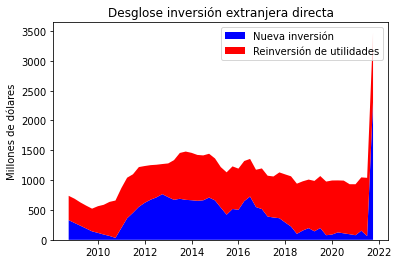

In [ ]:
# Recurso opcional de referencia:
# https://www.educative.io/edpresso/how-to-create-a-stack-plot-using-matplotlib


# Reinversión de utilidades
fdi_profits_reinvestment_accumulated =  trends.get_accumulated_values(
    balance_payements_dataframe[FDI_PROFITS_REINVESTMENT], lot_size=4) #4 trimestres

# Nueva inversión 
fdi_new_investment_accumulated = trends.get_accumulated_values(
    (balance_payements_dataframe[FOREIGN_DIRECT_INVESTMENT]
     - balance_payements_dataframe[FDI_PROFITS_REINVESTMENT]),
      lot_size=4) #4 trimestres

plt.stackplot(balance_payements_dataframe.date[3:],
         fdi_new_investment_accumulated[3:],
         fdi_profits_reinvestment_accumulated[3:],
          colors=['blue', 'red'], labels=['Nueva inversión','Reinversión de utilidades'])
plt.title("Desglose inversión extranjera directa")
plt.ylabel("Millones de dólares")
plt.legend()
plt.show()

In [ ]:
fdi_csv = "Inversion-Extranjera-Directa-Millones-Dolares-Acum-4-Trimestres.csv"
pd.DataFrame({"date": balance_payements_dataframe.date[3:],
              "quarter": balance_payements_dataframe.quarter[3:],
              "Nueva inversión": fdi_new_investment_accumulated[3:],
              "Reinversión de utilidades": fdi_profits_reinvestment_accumulated[3:]}
             ).to_csv(fdi_csv , index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/inversion-extranjera-directa/desglose'
csv_file = fdi_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Inversion-Extranjera-Directa-Millones-Dolares-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][  2.4 KiB/  2.4 KiB]                                                
Operation completed over 1 objects/2.4 KiB.                                      
Copying gs://ufm-market-trends/guatemala/inversion-extranjera-directa/desglose/Inversion-Extranjera-Directa-Millones-Dolares-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][  2.4 KiB/  2.4 KiB]                                                
Operation completed over 1 objects/2.4 KiB.                                      
date,quarter,Nueva inversión,Reinversión de utilidades
2008-10-01,2008Q4,329.9661,407.64499
2009-01-01,2009Q1,282.00001,406.59715
2009-04-01,2009Q2,236.78732,390.23996
2009-07-01,2009Q3,189.79096999999996,383.01513
2009-10-01,2009Q4,141.48158999999998,380.84253
2010-01-01,2010Q1,115.98060000000002,447.40599
2010-04-01,2010Q2,88.32831000000002,498.63174000000004
2010-07-01,2010Q3,64.30556

In [ ]:
# total_fdi_investment_accumulated = trends.get_accumulated_values(
#     balance_payements_dataframe[FOREIGN_DIRECT_INVESTMENT],
#       lot_size=4) #4 trimestres


# plt.plot(balance_payements_dataframe.date[3:],
#         exports_accumulated[3:], label="Exportaciones")
# plt.plot(balance_payements_dataframe.date[3:],
#         remittances_accumulated[3:], label="Remesas")
# plt.plot(balance_payements_dataframe.date[3:],
#         total_fdi_investment_accumulated[3:], label="Inversión extranjera directa total")
# plt.legend()
# plt.show()